In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
from sqlalchemy import create_engine
import mlflow.sklearn 


from scikitplot.estimators import plot_learning_curve
import scikitplot as skplt

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split ,cross_validate , learning_curve
from sklearn.metrics import classification_report , confusion_matrix , roc_curve
  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier

from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline as imbpipeline

Using my database from mysqlworkbench 

In [2]:
data_base = mysql.connector.connect(host="localhost" , user="root" , password="Yugioh11." , database="loan_prediction_file_rouge")
cur = data_base.cursor(buffered=True)
query = "select * from loan_prediction"
cur.execute(query)
tables = cur.fetchone()
#connect sql database to be used has dataframe 



In [3]:
df = pd.read_sql(query , data_base)
df
#sql dataframe

,MyUnknownColumn,Id,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,NaN,LP000001,1,1,0,1,0,2000,1900.0,700.0,360.0,0.0,0,1
1,1.0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2.0,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3.0,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4.0,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,609.0,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
477,610.0,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
478,611.0,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
479,612.0,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


dropping myunknown column 

In [4]:

df = df.drop('MyUnknownColumn' , axis=1)


dropping the id column we don't have any use for it in the model

In [5]:
df = df.drop('Id' , axis=1)

Encoding the data so they can be recognized by machine learning algorythme

In [6]:
categ = ["Gender" , "Dependents",  "Married" , "Education" , "Self_Employed" , "Property_Area" , "Loan_Status"]
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)


Defining X and y value 

In [7]:

X = df.drop(["Loan_Status" ], axis=1)
# X is the dataframe without the target 

y = df.Loan_Status
#y is the target 

Using x and y to split the dataframe in 2 80 percentof train 20 percent of test

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#we are splitting the dataset with train test split a test size of 20 percent of test and 80 percent of train 


Defining what we are going to use later in the model pipeline

In [9]:
preprocessing_sm = SMOTE(sampling_strategy='auto')

preprocessing_ss = Pipeline(steps=[
    ('standard scaler', StandardScaler())])

model = linear_model.LogisticRegression()
#the dataset is really umbalanced so i ill need the smote to compare once i found a decent model 
#standard scaler and min max scaler will be for the other models

Creating the model pipeline

dict_keys(['memory', 'steps', 'verbose', 'preprocessing_Standard_scaler', 'LogisticRegression', 'preprocessing_Standard_scaler__memory', 'preprocessing_Standard_scaler__steps', 'preprocessing_Standard_scaler__verbose', 'preprocessing_Standard_scaler__standard scaler', 'preprocessing_Standard_scaler__standard scaler__copy', 'preprocessing_Standard_scaler__standard scaler__with_mean', 'preprocessing_Standard_scaler__standard scaler__with_std', 'LogisticRegression__C', 'LogisticRegression__class_weight', 'LogisticRegression__dual', 'LogisticRegression__fit_intercept', 'LogisticRegression__intercept_scaling', 'LogisticRegression__l1_ratio', 'LogisticRegression__max_iter', 'LogisticRegression__multi_class', 'LogisticRegression__n_jobs', 'LogisticRegression__penalty', 'LogisticRegression__random_state', 'LogisticRegression__solver', 'LogisticRegression__tol', 'LogisticRegression__verbose', 'LogisticRegression__warm_start'])
[1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0

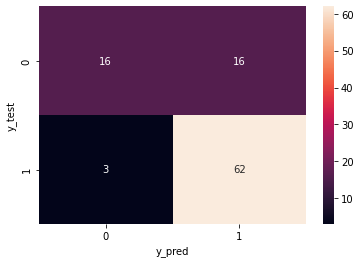

accuracy train : 0.812
accuracy test : 0.804
              precision    recall  f1-score   support

           0       0.84      0.50      0.63        32
           1       0.79      0.95      0.87        65

    accuracy                           0.80        97
   macro avg       0.82      0.73      0.75        97
weighted avg       0.81      0.80      0.79        97

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
73        1        1           2          0              0             6250   
415       1        0           0          1              0             6783   
392       0        0           0          0              0             3159   
278       1        1           0          1              0             3000   
400       1        1           2          0              0             3283   
..      ...      ...         ...        ...            ...              ...   
238       1        1           1          0              0             2014

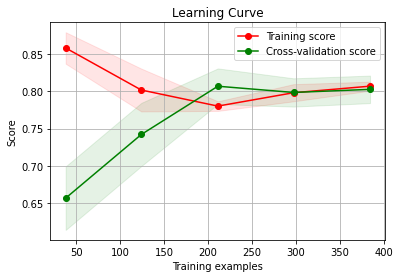

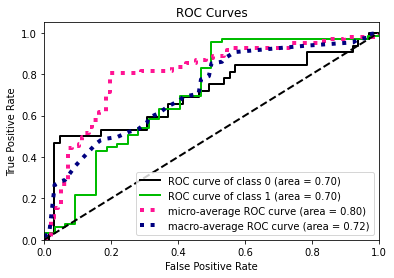

In [10]:
def pipeline_logistic_regression_standard_scaler():
    pipeline_log = Pipeline(steps = [['preprocessing_Standard_scaler'  , preprocessing_ss],
                                    ['LogisticRegression', model]
                                         ])
    pipeline_log.fit(X_train , y_train.values)
    print(pipeline_log.get_params().keys())

    

    y_pred_log = pipeline_log.predict(X_test)
    print(y_pred_log)


    cm = confusion_matrix(y_test, y_pred_log)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test') 
    plt.show()

    print("accuracy train : %.3f"%pipeline_log.score(X_train , y_train))
    print("accuracy test : %.3f"%pipeline_log.score(X_test , y_test))
    
    plot_learning_curve(pipeline_log, X , y)

    print(classification_report(y_test, y_pred_log))

    y_probas = pipeline_log.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas)
    
    X_test['proba_ml'] =pipeline_log.score(X_train , y_train)
    print(X_test)

    #X_test['predict'] = pred
    #X_test

pipeline_logistic_regression_standard_scaler()


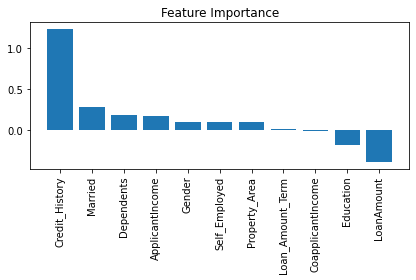

In [11]:
def feature_importance():
    importances = model.coef_[0]
#
# Sort the feature importance in descending order
#
    sorted_indices = np.argsort(importances)[::-1]
    
 
    plt.title('Feature Importance')
    plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
    plt.tight_layout()
    plt.show()
feature_importance()

In [12]:
importances = model.coef_[0]
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

doing the connection and exporting to mysqlworkbench

In [13]:
#data_base = mysql.connector.connect(host="localhost" , user="root" , password="Yugioh11." , database="loan_prediction_file_rouge")
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(
    host="eu-cdbr-west-03.cleardb.net" , user="bf69f50fa6ad56" , pw="5f7b7264" , db="heroku_d7c80f3b4d061a2"))
conn = engine.connect()
X_test.to_sql('ml_pred', conn, if_exists='replace', index = False)

creating pickle file for deployement

In [15]:
with open('model_pkl.pickle', 'wb') as files:
    pickle.dump(pipeline_logistic_regression_standard_scaler, files)